In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/kkk/Copy of shuffled_df_Tu.csv", header = 0, encoding='utf-8-sig')

In [10]:
df

,texts,data_labels
0,ماسط,negative
1,تمويل احنا مرهونين معنا شيء,positive
2,يوحد خمج اتفه اعلك,negative
3,نااااكرهو شعر القنفود زعمة قداش من قملة في راس...,negative
4,ربي يلطف بينا,positive
...,...,...
16473,كلب ديوث,negative
16474,قرد,negative
16475,مالغري كلشي تبقاو خاوتنة ودين الاسلام قال المس...,positive
16476,تم,positive


In [11]:
df['text'] =df['texts']

In [12]:
df = df.drop('texts', axis=1)

In [13]:
# df['labels'] = df['data_labels'].replace({'negative': 0, 'positive': 1})
df['labels'] = df['data_labels']

In [14]:
df = df.drop('data_labels', axis=1)

<Axes: xlabel='labels', ylabel='count'>

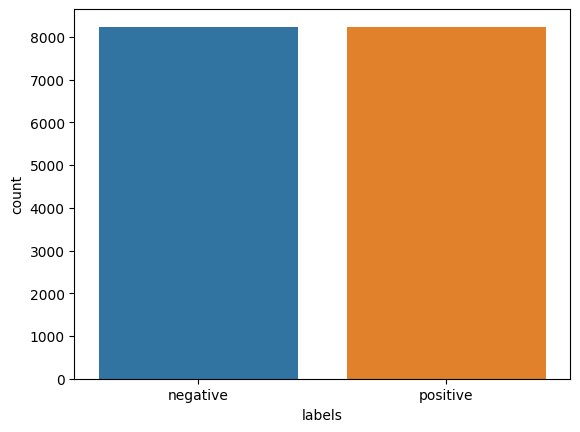

In [15]:
import seaborn as sns
sns.countplot(x=df["labels"])

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train and eval DataFrames
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of train_df and eval_df
print("Train DataFrame shape:", train_df.shape)
print("Eval DataFrame shape:", eval_df.shape)

Train DataFrame shape: (13182, 2)
Eval DataFrame shape: (3296, 2)


In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 93.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 28.

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

"""# Preparing train data
train_data = [
    ["Aragorn was the heir of Isildur", 1],
    ["Frodo was the heir of Isildur", 0],
    ["Pippin is stronger than Merry", 2],
]
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Preparing eval data
eval_data = [
    ["Aragorn was the heir of Elendil", 1],
    ["Sam was the heir of Isildur", 0],
    ["Merrry is stronger than Pippin", 2],
]
eval_df = pd.DataFrame(eval_data)
eval_df.columns = ["text", "labels"]"""

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=3)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'asafaya/bert-base-arabic',
    num_labels=3,
    args=model_args,
    # use_cuda= False
)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Make predictions with the model
#predictions, raw_outputs = model.predict(["Sam was a Wizard"])


Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.we

  0%|          | 0/13182 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/1648 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1648 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1648 [00:00<?, ?it/s]

  0%|          | 0/3296 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/412 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.764540637734071, 'eval_loss': 0.6022620237278706}

In [ ]:
predictions, raw_outputs = model.predict(["الموت"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

array([0])

In [ ]:
!zip -r /content/outputs.zip /content/outputs

  adding: content/outputs/ (stored 0%)
  adding: content/outputs/pytorch_model.bin (deflated 7%)
  adding: content/outputs/checkpoint-4944-epoch-3/ (stored 0%)
  adding: content/outputs/checkpoint-4944-epoch-3/pytorch_model.bin (deflated 7%)
  adding: content/outputs/checkpoint-4944-epoch-3/special_tokens_map.json (deflated 42%)
  adding: content/outputs/checkpoint-4944-epoch-3/tokenizer_config.json (deflated 46%)
  adding: content/outputs/checkpoint-4944-epoch-3/tokenizer.json (deflated 73%)
  adding: content/outputs/checkpoint-4944-epoch-3/training_args.bin (deflated 49%)
  adding: content/outputs/checkpoint-4944-epoch-3/model_args.json (deflated 62%)
  adding: content/outputs/checkpoint-4944-epoch-3/config.json (deflated 51%)
  adding: content/outputs/checkpoint-4944-epoch-3/optimizer.pt (deflated 21%)
  adding: content/outputs/checkpoint-4944-epoch-3/scheduler.pt (deflated 49%)
  adding: content/outputs/checkpoint-4944-epoch-3/vocab.txt (deflated 63%)
  adding: content/outputs/chec

In [ ]:
from google.colab import files
files.download('/content/outputs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>